In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import random
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from graphviz import Source
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score






In [115]:
df = pd.read_csv("CKD_proccesed.csv")

In [116]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1.0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3.0,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,4.0,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,5.0,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,396.0,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,47.0,6700.0,4.900000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
365,397.0,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7800.0,6.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
366,398.0,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,49.0,6600.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
367,399.0,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,51.0,7200.0,5.900000,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [130]:
x = df.iloc[:,1:25]
y = df.iloc[:,25]
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.000000,...,15.4,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,147.190476,...,11.3,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.000000,...,9.6,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.000000,...,11.2,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.000000,...,11.6,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.000000,...,15.7,47.0,6700.0,4.900000,0.0,0.0,0.0,1.0,0.0,0.0
365,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.000000,...,16.5,54.0,7800.0,6.200000,0.0,0.0,0.0,1.0,0.0,0.0
366,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.000000,...,15.8,49.0,6600.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0
367,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.000000,...,14.2,51.0,7200.0,5.900000,0.0,0.0,0.0,1.0,0.0,0.0


In [131]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=1)
x_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
191,68.0,90.0,1.010,0.0,0.0,1.0,1.0,0.0,0.0,238.000000,...,9.800000,28.000000,8000.000000,3.300000,1.0,1.0,0.0,0.0,0.0,0.0
80,73.0,100.0,1.010,3.0,2.0,0.0,0.0,1.0,0.0,295.000000,...,9.200000,30.000000,7000.000000,3.200000,1.0,1.0,1.0,0.0,0.0,0.0
88,71.0,90.0,1.015,2.0,0.0,1.0,0.0,1.0,1.0,88.000000,...,11.300000,33.000000,10700.000000,3.900000,0.0,0.0,0.0,1.0,0.0,0.0
227,42.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,98.000000,...,13.900000,44.000000,8400.000000,5.500000,0.0,0.0,0.0,1.0,0.0,0.0
328,74.0,60.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,88.000000,...,17.200000,53.000000,6000.000000,4.500000,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,37.0,100.0,1.010,0.0,0.0,0.0,1.0,0.0,0.0,147.190476,...,15.000000,44.000000,4100.000000,5.200000,1.0,0.0,0.0,1.0,0.0,0.0
255,71.0,70.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,81.000000,...,14.700000,44.000000,9800.000000,6.000000,0.0,0.0,0.0,1.0,0.0,0.0
72,48.0,70.0,1.015,1.0,0.0,1.0,1.0,0.0,0.0,127.000000,...,12.606825,38.874618,8406.506849,4.707435,1.0,1.0,0.0,1.0,0.0,0.0
235,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,133.000000,...,13.200000,41.000000,6800.000000,5.300000,0.0,0.0,0.0,1.0,0.0,0.0


In [144]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
predict = regr.predict(x_test)
for c in range(len(predict)):
    if predict[c]>0.5:
        predict[c]=1.
    else:
        predict[c]=0.
print(predict)

[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]


In [133]:
print("Accuracy:",metrics.accuracy_score(y_test, predict)) 
confusion = confusion_matrix(predict, y_test)
print(confusion)

Accuracy: 0.963963963963964
[[49  4]
 [ 0 58]]


In [134]:
log = linear_model.LogisticRegression()
log.fit(x_train,y_train)
pred = log.predict(x_test)
# print(pred)

/Users/itamaryuran/opt/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
print("Accuracy:",metrics.accuracy_score(y_test, pred)) 
confusion = confusion_matrix(pred, y_test)
print(confusion)


Accuracy: 0.8828828828828829
[[44  8]
 [ 5 54]]


In [159]:
regr.coef_



array([-2.23666722e-04,  3.18135784e-03, -2.26079122e+01,  6.45285218e-02,
       -2.64143691e-02, -3.83467229e-02,  1.05687901e-02, -5.46624992e-02,
       -8.47418290e-02,  5.30233259e-04, -1.14231935e-03, -2.26624339e-03,
       -2.94244771e-03,  7.41061055e-03, -5.67553579e-02, -5.31127109e-03,
        1.56695076e-06, -2.45140653e-02,  1.20232901e-01,  9.39729149e-02,
       -1.63116354e-02, -6.49066471e-02,  4.95716208e-02, -1.00596155e-01])

In [155]:
log.coef_

array([[-4.29313408e-02,  1.61705531e-01,  2.28860482e-03,
         1.39004468e-01,  6.26744059e-03, -1.72265257e-02,
        -1.50173477e-02,  5.94481489e-03,  3.43505689e-03,
         5.28010593e-02,  7.55238488e-03,  8.10258241e-02,
         5.93580674e-02,  3.50227943e-03, -2.41396471e-01,
        -5.56032072e-01,  1.59583305e-04, -5.80587797e-02,
         3.51518592e-02,  3.20700620e-02,  4.63787434e-03,
        -2.13296356e-02,  2.64221259e-02,  9.61609262e-03]])

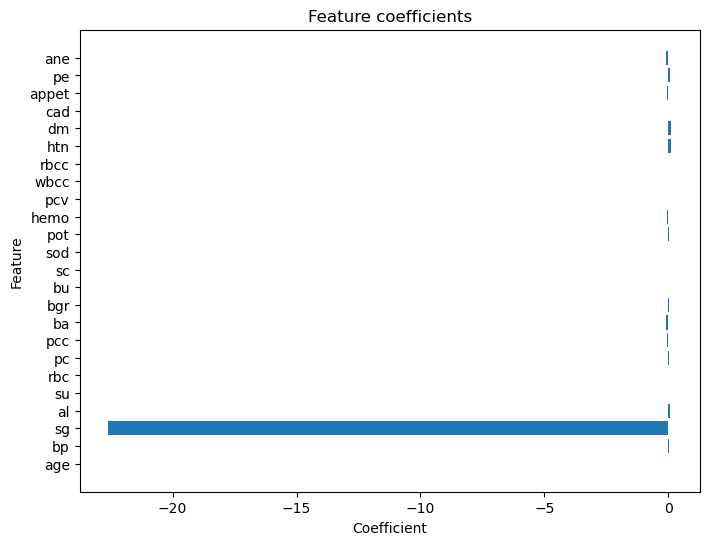

In [158]:
regr.coef_
coefs = regr.coef_

# Create a bar plot of the coefficients
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(x_train.columns, coefs)
plt.title('Feature coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()
fig.savefig('coef.png', dpi=300)

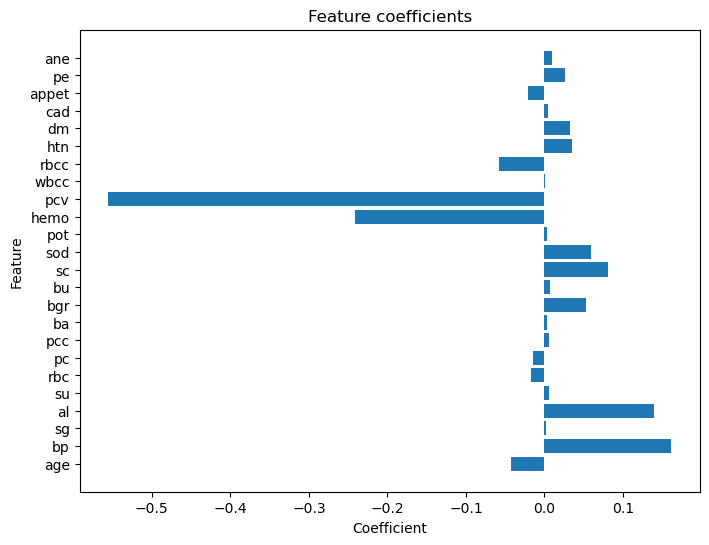

In [126]:
coefs = log.coef_[0]

# Create a bar plot of the coefficients
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(x_train.columns, coefs)
plt.title('Feature coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()
fig.savefig('coef.png', dpi=300)


In [142]:
confusion = confusion_matrix(y_test, pred)
accuracy = round(metrics.accuracy_score(y_test, pred),3)
precision = round(metrics.precision_score(y_test, pred),3)
recall = round(metrics.recall_score(y_test, pred),3)
f1 = round(metrics.f1_score(y_test, pred),3)
auc = round(roc_auc_score(y_test, pred),3)
scores = cross_val_score(log, x, y, cv=5)
print("\tLogistic Regression")
print('Confusion Matrics:\t\t',confusion)
print("Accuracy:\t\t\t",accuracy) 
print("Precision:\t\t\t",precision) 
print("Recall:\t\t\t\t",recall) 
print("F1:\t\t\t\t",f1) 
print("Auc:\t\t\t\t",auc) 
print("Cross-validation scores:\t", scores)
x

	Logistic Regression
Confusion Matrics:		 [[44  5]
 [ 8 54]]
Accuracy:			 0.883
Precision:			 0.915
Recall:				 0.871
F1:				 0.893
Auc:				 0.884
Cross-validation scores:	 [0.93243243 0.93243243 0.82432432 0.94594595 0.94520548]


/Users/itamaryuran/opt/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/itamaryuran/opt/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.000000,...,15.4,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,147.190476,...,11.3,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.000000,...,9.6,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.000000,...,11.2,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.000000,...,11.6,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.000000,...,15.7,47.0,6700.0,4.900000,0.0,0.0,0.0,1.0,0.0,0.0
365,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.000000,...,16.5,54.0,7800.0,6.200000,0.0,0.0,0.0,1.0,0.0,0.0
366,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.000000,...,15.8,49.0,6600.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0
367,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.000000,...,14.2,51.0,7200.0,5.900000,0.0,0.0,0.0,1.0,0.0,0.0


In [160]:

confusion = confusion_matrix(y_test, predict)
accuracy = round(metrics.accuracy_score(y_test, predict),3)
precision = round(metrics.precision_score(y_test, predict),3)
recall = round(metrics.recall_score(y_test, predict),3)
f1 = round(metrics.f1_score(y_test, predict),3)
auc = round(roc_auc_score(y_test, predict),3)
scores = cross_val_score(regr, x, y, cv=5)
print("\tLinear Regression")
print('Confusion Matrics:\t\t',confusion)
print("Accuracy:\t\t\t",accuracy) 
print("Precision:\t\t\t",precision) 
print("Recall:\t\t\t\t",recall) 
print("F1:\t\t\t\t",f1) 
print("Auc:\t\t\t\t",auc) 
print("Cross-validation scores:\t", scores)



	Linear Regression
Confusion Matrics:		 [[49  0]
 [ 4 58]]
Accuracy:			 0.964
Precision:			 1.0
Recall:				 0.935
F1:				 0.967
Auc:				 0.968
Cross-validation scores:	 [ 0.         0.        -1.8555501  0.         0.       ]
